In [1]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('./airline_passengers.csv')
print(df.dtypes)
df.head()

Month                       object
Thousands of Passengers    float64
dtype: object


,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [5]:
df.dropna(inplace = True)
df['Month'] = pd.DatetimeIndex(df['Month'])
df.dtypes

Month                      datetime64[ns]
Thousands of Passengers           float64
dtype: object

In [15]:
df = df.rename(columns={'Month': 'ds',
                        'Thousands of Passengers': 'y'})

df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


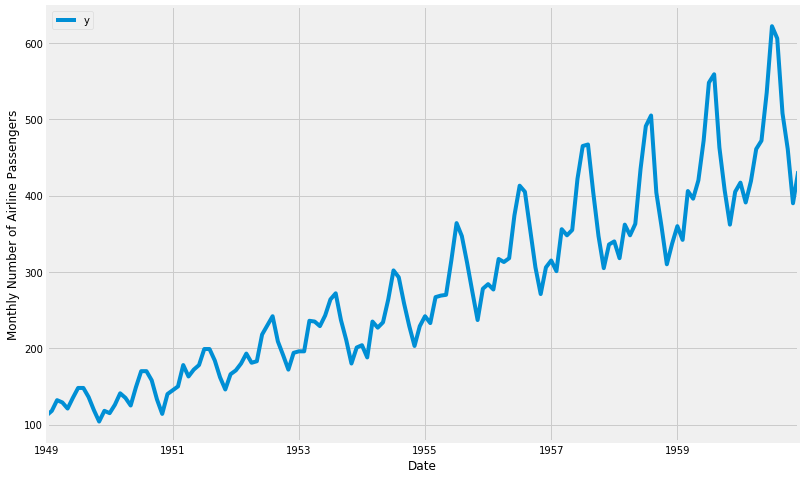

In [27]:
pd.plotting.register_matplotlib_converters()
ax = df.set_index('ds').plot(figsize=(12, 8))
plt.ylabel('Monthly Number of Airline Passengers')
plt.xlabel('Date')

plt.show()

In [30]:
my_model = Prophet(interval_width = 0.95).fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Since we would need the same datetime index for future prediction we can use an inbuilt 
method for this.
Periods is set to 36 to predict data for 3 years
Frequency is set to MS to indicate monthly intervals.

In [31]:
future_dates = my_model.make_future_dataframe(periods = 36, freq = 'MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [36]:
#we'll get a large dataframe but we're only interested in these columns.
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,85.667868,45.369923,128.534840
1,1949-02-01,79.176553,33.353441,121.747874
2,1949-03-01,110.839332,64.619051,156.883199
3,1949-04-01,108.472210,64.893231,158.256976
4,1949-05-01,111.854130,70.341451,157.175496
...,...,...,...,...
175,1963-08-01,650.059659,608.450107,690.662705
176,1963-09-01,602.755802,557.751778,646.671688
177,1963-10-01,566.569663,521.294685,609.859626
178,1963-11-01,534.733242,492.678376,578.820261


Values may differ from the predcted values since Prophet uses Markov chain Monte carlo(MCMC) method to generate forecasts. 
Note : It is a stochastic process 

The black dots are observed values, blue line is the predicted value and the shaded light
blue region is the uncertainity interval.

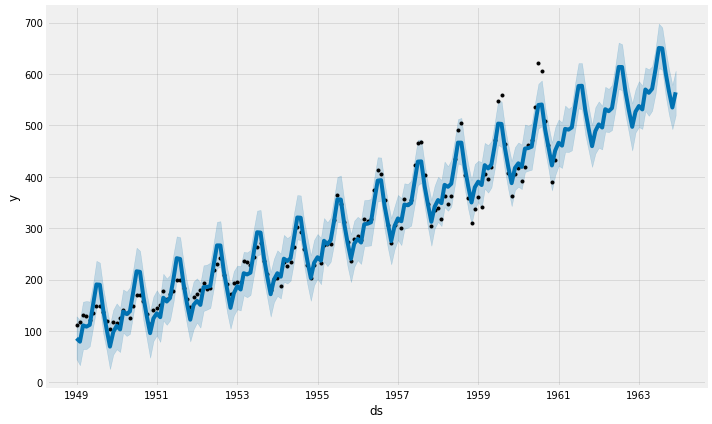

In [40]:
plot = my_model.plot(forecast,uncertainty=True)

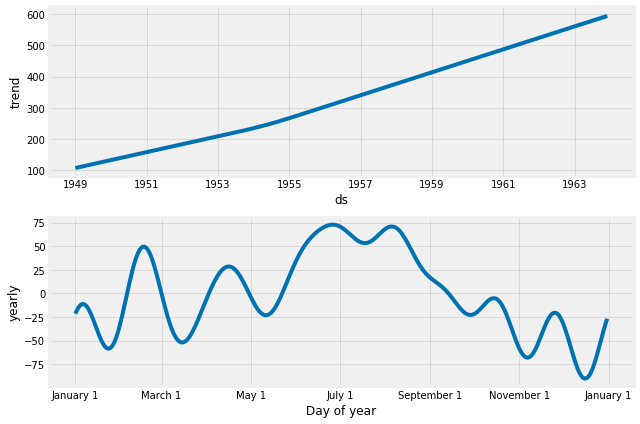

In [42]:
plot = my_model.plot_components(forecast)

Interesting facts are available in these plots:
As you can see the trend is showing an increase over time and that is obvious since more
people started flying over time.
May to mid July showed high traffic since it's a holiday period.